============================================================================
 HIT140 Foundations of Data Science – Assessment 3 (Objective 2)
 Group Project: Bat vs Rat – The Forage Files
 Member B: Jyoti Adhikari (s395089)
 Section: Exploratory Data Analysis (EDA) and Visualisation
----------------------------------------------------------------------------
 Purpose:
   This notebook performs exploratory data analysis (EDA) using the cleaned
   datasets provided by the zoologists:
       1. cleaned_bat_data.csv → Bat behaviour data
       2. cleaned_rat_data.csv → Rat activity data

   The goal is to visualise, summarise, and interpret behavioural patterns
   that support further inferential analyses (Investigations A and B).
============================================================================

In [3]:
# ------------------------------
# 1. Import Required Libraries
# ------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Configure pandas and seaborn display settings for better readability
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

In [5]:
# ------------------------------
# 2. Load Cleaned Datasets
# ------------------------------
# Ensure both cleaned CSV files are in the same directory as this notebook.
bat_data = pd.read_csv("cleaned_bat_data.csv")
rat_data = pd.read_csv("cleaned_rat_data.csv")

In [6]:
print("Cleaned datasets successfully loaded.")
print(f"Bat dataset shape: {bat_data.shape}")
print(f"Rat dataset shape: {rat_data.shape}")

Cleaned datasets successfully loaded.
Bat dataset shape: (906, 13)
Rat dataset shape: (2123, 7)


In [7]:
# ------------------------------
# 3. Inspect Data Structure and Quality
# ------------------------------
# Display dataset structure, types, and missing values
print("\n--- Bat Data Overview ---")
print(bat_data.info())
print("\nMissing values per column (Bat):\n", bat_data.isnull().sum())


--- Bat Data Overview ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906 entries, 0 to 905
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   start_time                 906 non-null    object 
 1   bat_landing_to_food        906 non-null    float64
 2   habit                      865 non-null    object 
 3   rat_period_start           906 non-null    object 
 4   rat_period_end             906 non-null    object 
 5   seconds_after_rat_arrival  906 non-null    int64  
 6   risk                       906 non-null    int64  
 7   reward                     906 non-null    int64  
 8   month                      906 non-null    int64  
 9   sunset_time                906 non-null    object 
 10  hours_after_sunset         906 non-null    float64
 11  season                     906 non-null    int64  
 12  rat_presence_duration      906 non-null    float64
dtypes: float64(3), int64(5)

In [8]:
print("\n--- Rat Data Overview ---")
print(rat_data.info())
print("\nMissing values per column (Rat):\n", rat_data.isnull().sum())


--- Rat Data Overview ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2123 entries, 0 to 2122
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time                2123 non-null   object 
 1   month               2123 non-null   int64  
 2   hours_after_sunset  2123 non-null   float64
 3   bat_landing_number  2123 non-null   int64  
 4   food_availability   2123 non-null   float64
 5   rat_minutes         2123 non-null   float64
 6   rat_arrival_number  2123 non-null   int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 116.2+ KB
None

Missing values per column (Rat):
 time                  0
month                 0
hours_after_sunset    0
bat_landing_number    0
food_availability     0
rat_minutes           0
rat_arrival_number    0
dtype: int64


Comment:
  This ensures both cleaned datasets are well-structured, with correct datatypes
  and minimal missing values before proceeding to descriptive analysis.

In [9]:
# ------------------------------
# 4. Descriptive Statistics
# ------------------------------
print("\nSummary Statistics – Cleaned Bat Dataset\n", bat_data.describe())
print("\nSummary Statistics – Cleaned Rat Dataset\n", rat_data.describe())


Summary Statistics – Cleaned Bat Dataset
        bat_landing_to_food  seconds_after_rat_arrival        risk      reward  \
count           906.000000                 906.000000  906.000000  906.000000   
mean             11.720544                 282.786976    0.494481    0.534216   
std              27.658777                 241.092545    0.500246    0.499103   
min               0.010238                   0.000000    0.000000    0.000000   
25%               1.000000                  89.250000    0.000000    0.000000   
50%               4.000000                 206.000000    0.000000    1.000000   
75%              11.750000                 447.250000    1.000000    1.000000   
max             443.000000                 949.000000    1.000000    1.000000   

            month  hours_after_sunset      season  rat_presence_duration  
count  906.000000          906.000000  906.000000             906.000000  
mean     3.800221            5.532579    0.833333             550.728477  
st

Comment:
  Descriptive summaries reveal central tendencies and variability of behaviour
  such as bat risk, reward, and rat arrival patterns.

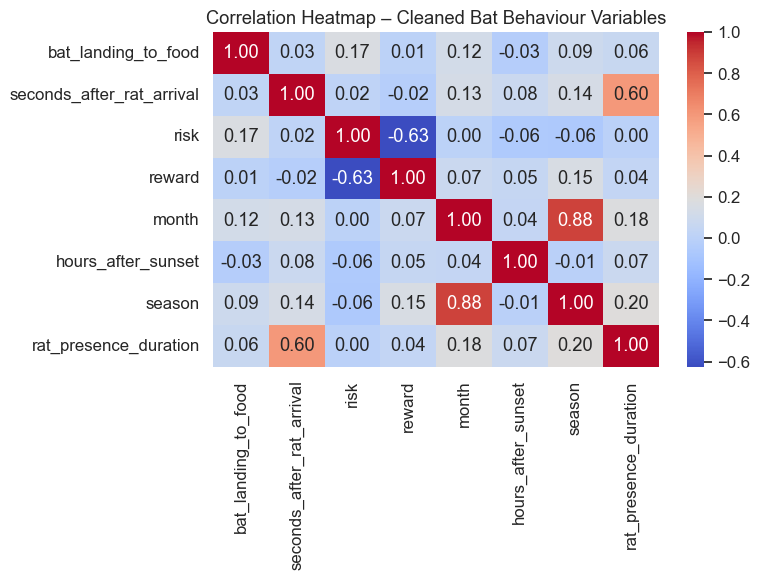

In [10]:
# ------------------------------
# 5. Correlation Analysis (Bat Dataset)
# ------------------------------
plt.figure(figsize=(8, 6))
sns.heatmap(
    bat_data.corr(numeric_only=True),
    annot=True, cmap="coolwarm", fmt=".2f"
)
plt.title("Correlation Heatmap – Cleaned Bat Behaviour Variables")
plt.tight_layout()
plt.show()

Observation:
  Correlation heatmap highlights associations between risk, reward, and time-related
  features such as hours_after_sunset and seconds_after_rat_arrival.

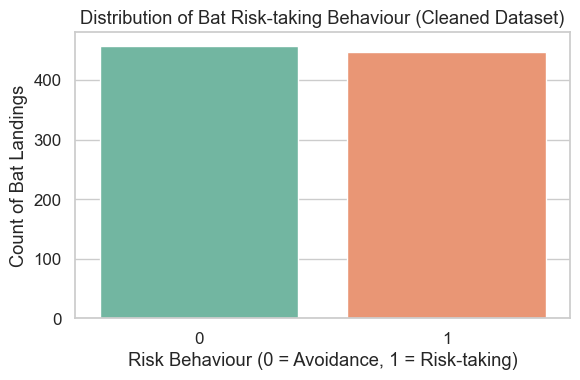

In [11]:
# ------------------------------
# 6. Distribution of Bat Risk-taking Behaviour
# ------------------------------
plt.figure(figsize=(6, 4))
sns.countplot(data=bat_data, x="risk", hue="risk", palette="Set2", legend=False)
plt.title("Distribution of Bat Risk-taking Behaviour (Cleaned Dataset)")
plt.xlabel("Risk Behaviour (0 = Avoidance, 1 = Risk-taking)")
plt.ylabel("Count of Bat Landings")
plt.tight_layout()
plt.show()

Observation:
  The cleaned data confirms whether the majority of bats exhibit risk-avoidant
  or risk-taking tendencies.

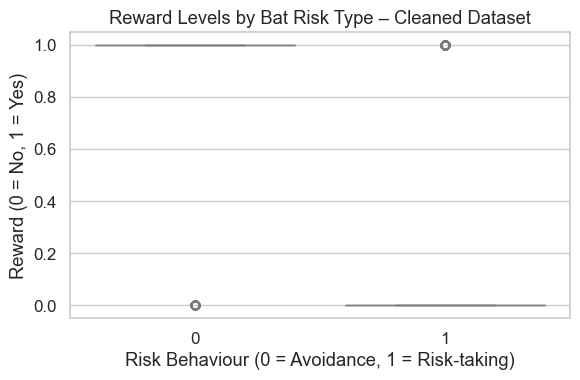

In [12]:
# ------------------------------
# 7. Relationship Between Risk and Reward
# ------------------------------
plt.figure(figsize=(6, 4))
sns.boxplot(data=bat_data, x="risk", y="reward", hue="risk", palette="Pastel1", legend=False)
plt.title("Reward Levels by Bat Risk Type – Cleaned Dataset")
plt.xlabel("Risk Behaviour (0 = Avoidance, 1 = Risk-taking)")
plt.ylabel("Reward (0 = No, 1 = Yes)")
plt.tight_layout()
plt.show()

Observation:
  Visualising reward distribution by risk behaviour helps assess whether
  risk-taking behaviour yields higher payoff among bats.

In [13]:
# ------------------------------
# 8. Seasonal Pattern – Rat Arrivals
# ------------------------------
# If 'season' column not present, derive it from month
if "season" not in rat_data.columns:
    def month_to_season(month):
        if month in [12, 1, 2]:
            return "Winter"
        elif month in [3, 4, 5]:
            return "Spring"
        elif month in [6, 7, 8]:
            return "Summer"
        else:
            return "Autumn"

    if "month" in rat_data.columns:
        rat_data["season"] = rat_data["month"].apply(month_to_season)

/var/folders/0b/gndyl6b16hdgx45jc_b6_3q00000gn/T/ipykernel_8548/175378080.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rat_data, x="season", y="rat_arrival_number", palette="coolwarm")


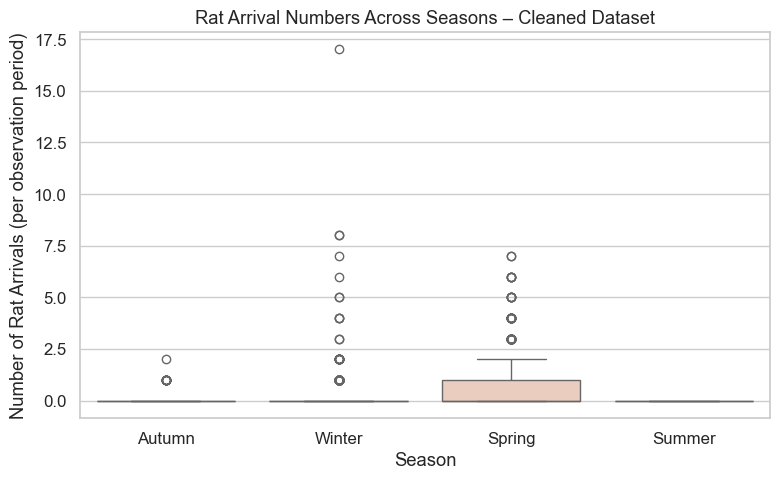

In [14]:
# Create boxplot for seasonal rat arrival trends
if "season" in rat_data.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=rat_data, x="season", y="rat_arrival_number", palette="coolwarm")
    plt.title("Rat Arrival Numbers Across Seasons – Cleaned Dataset")
    plt.xlabel("Season")
    plt.ylabel("Number of Rat Arrivals (per observation period)")
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ 'season' variable not found or could not be derived. Skipping seasonal plot.")

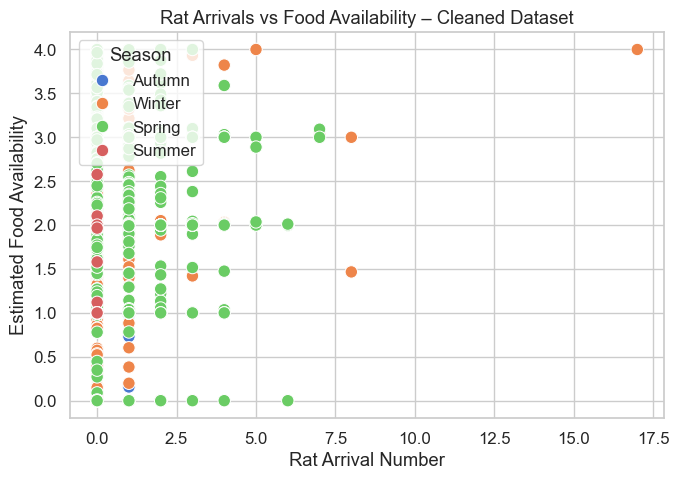

In [15]:
# ------------------------------
# 9. Relationship Between Rat Arrivals and Food Availability
# ------------------------------
if {"rat_arrival_number", "food_availability"}.issubset(rat_data.columns):
    plt.figure(figsize=(7, 5))
    sns.scatterplot(
        data=rat_data,
        x="rat_arrival_number",
        y="food_availability",
        hue="season" if "season" in rat_data.columns else None,
        s=80
    )
    plt.title("Rat Arrivals vs Food Availability – Cleaned Dataset")
    plt.xlabel("Rat Arrival Number")
    plt.ylabel("Estimated Food Availability")
    plt.legend(title="Season", loc="upper left")
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Required columns missing for scatterplot: 'rat_arrival_number' or 'food_availability'.")

In [16]:
# ------------------------------
# 10. Optional Exports (Summary Tables)
# ------------------------------
# Export descriptive summaries for appendices or future analysis
bat_data.describe().to_csv("output_cleaned_bat_summary.csv")
rat_data.describe().to_csv("output_cleaned_rat_summary.csv")

In [17]:
print("\nEDA completed successfully using cleaned datasets.")
print("Summary files exported: output_cleaned_bat_summary.csv, output_cleaned_rat_summary.csv")


EDA completed successfully using cleaned datasets.
Summary files exported: output_cleaned_bat_summary.csv, output_cleaned_rat_summary.csv


-----------------------------------------------------------------------------
End of Notebook
-----------------------------------------------------------------------------
 Summary:
    This cleaned data EDA explored bat risk–reward patterns and rat seasonal
    behaviour using visualisation and statistical summaries. The findings
    indicate trends in foraging behaviour that support Investigations A and B.

 Author: Jyoti Adhikari (s395089)
 Course: HIT140 – Foundations of Data Science, Charles Darwin University (2025)
-----------------------------------------------------------------------------